# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat
import matplotlib.pyplot as plt

### Test prepData

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref = prep.prep_data(data,center, length=length,subrun=0)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


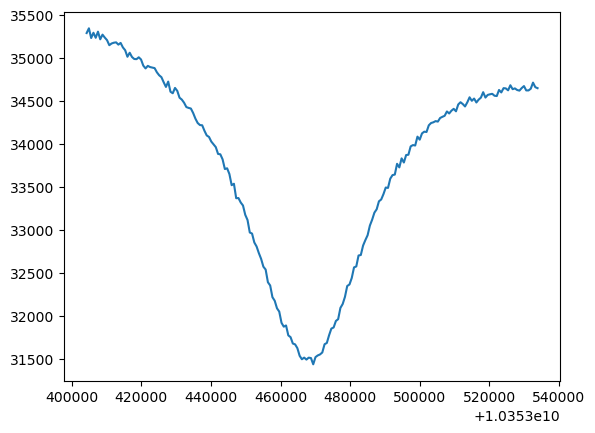

In [3]:
plt.plot(freq,fft)

### Test Fits

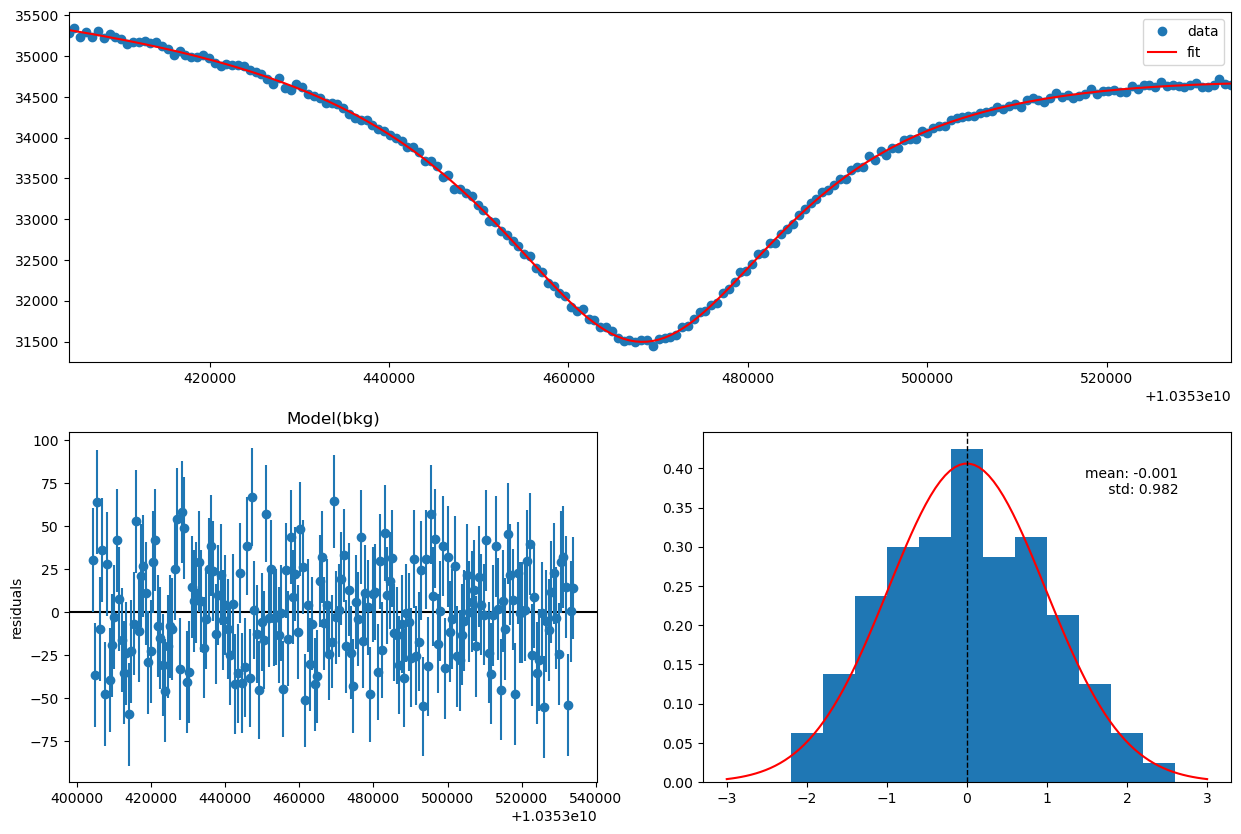

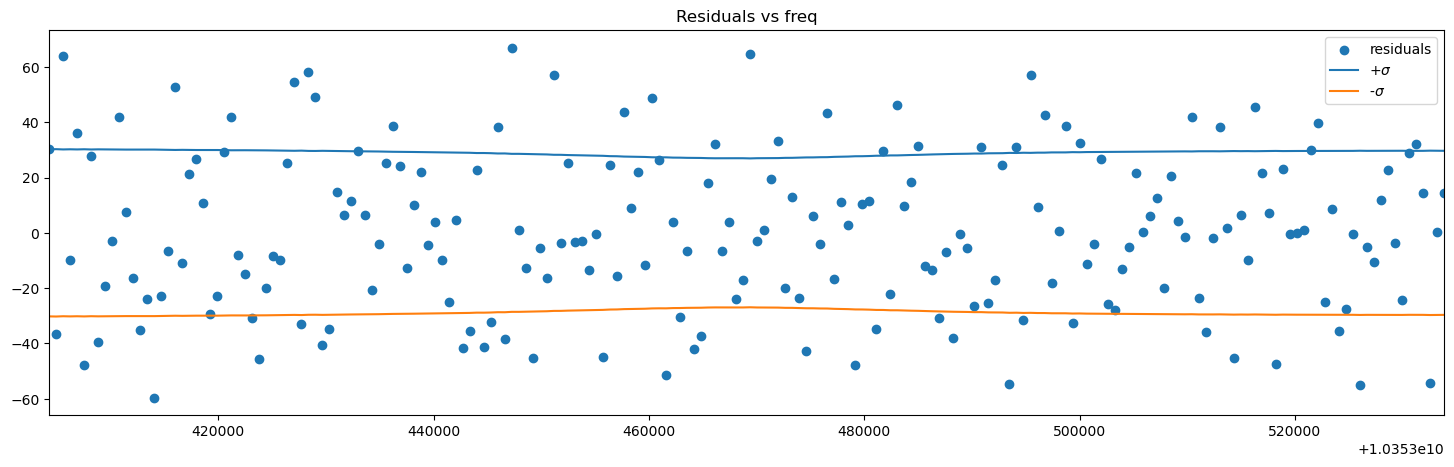

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

In [5]:
mu0s=[]
for x0 in freq:
    res_sig = fits.fit_sig(freq, fft, weights, x0, res_bkg, fits.signal_gauss,par_vary=False)
    mu0s.append(res_sig.best_values["mu"])
    

In [6]:
import numpy as np
freq[np.argmax(mu0s)]

10353409505.208334

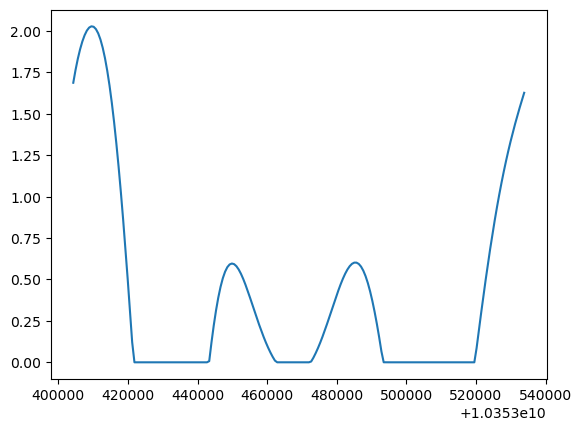

In [7]:
plt.plot(freq,mu0s)

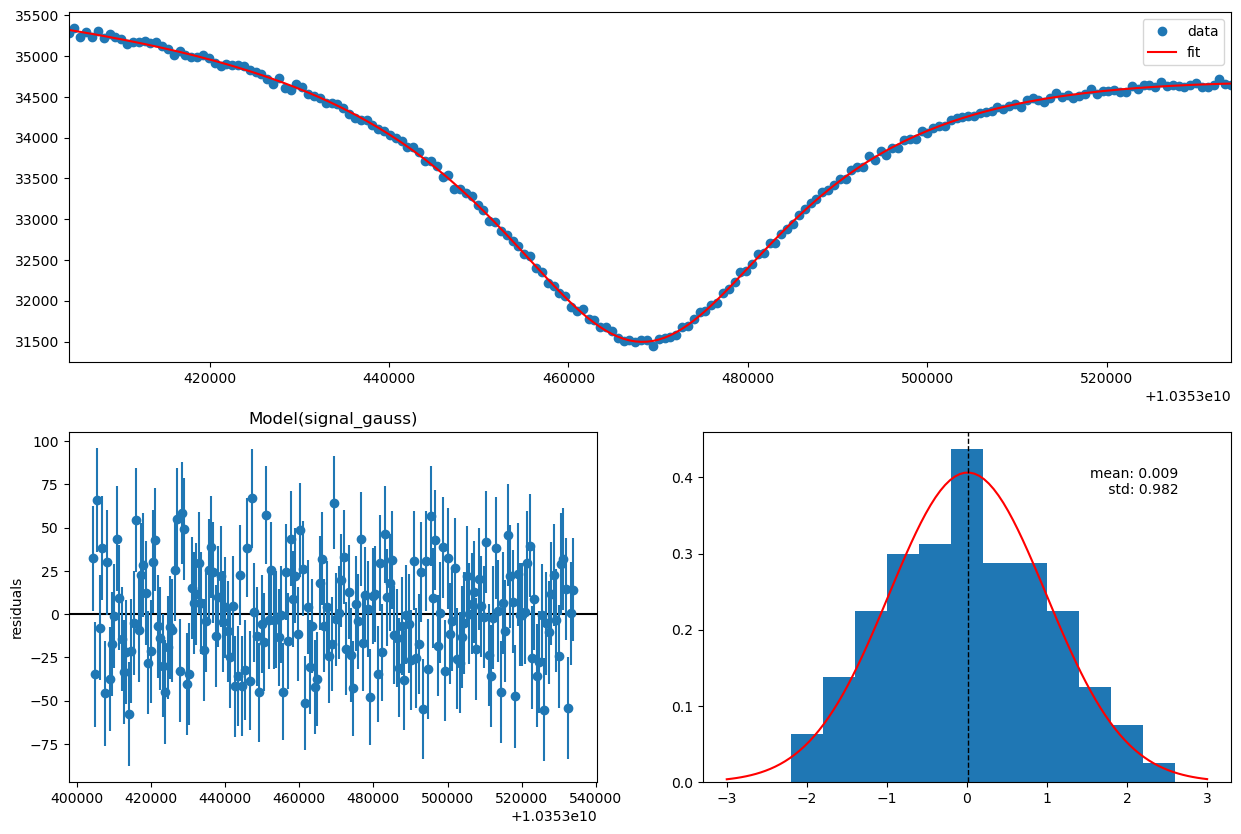

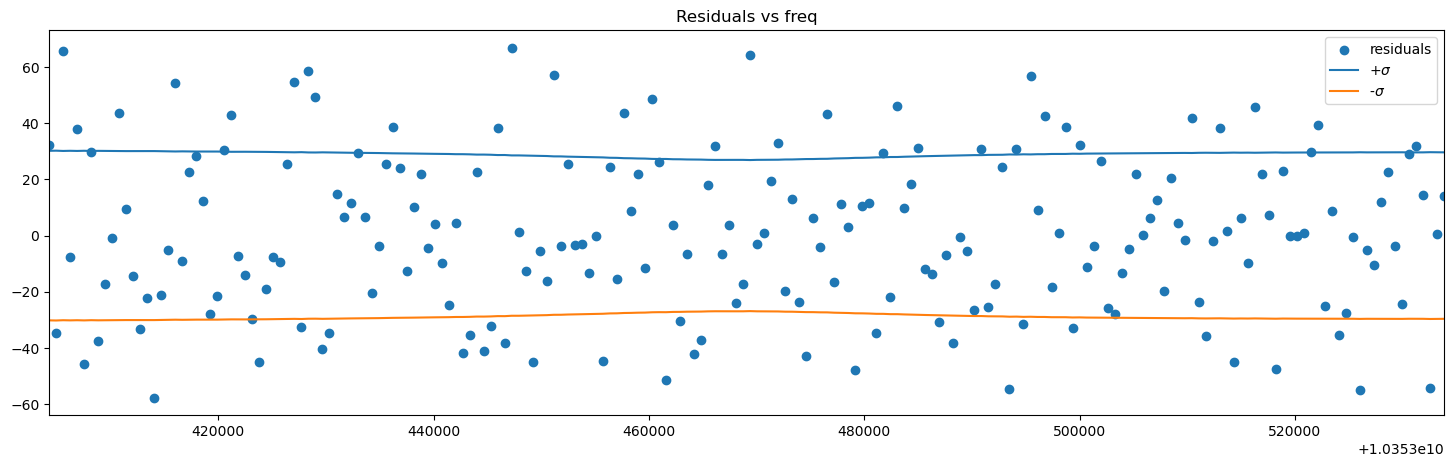

In [8]:
res_sig = fits.fit_sig(freq, fft, weights, 10353409505.208334, res_bkg, fits.signal_gauss,par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

### Test Statistics

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg, res_sig)
q0_obs

0.10792699411331341

In [10]:
# z_vec=[]
# i=0
# for x0 in freq:
#     z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0, fits.signal_gauss, n=300, draw=False)
    
#     print("trial:",i)
#     if i%10 == 0:
#         print("x0:",x0)
#         print("z:",z)
    
#     print("------------------------")
#     i+=1
#     z_vec.append(z)

In [11]:
# plt.plot(freq,z_vec)

In [12]:
# z_vec=np.array(z_vec)
# np.max(z_vec),freq[np.argmax(z_vec)]

### Significance plot examples

In [13]:
x0_1=10353412109.375
x0_2=center
x0_3=freq[116]

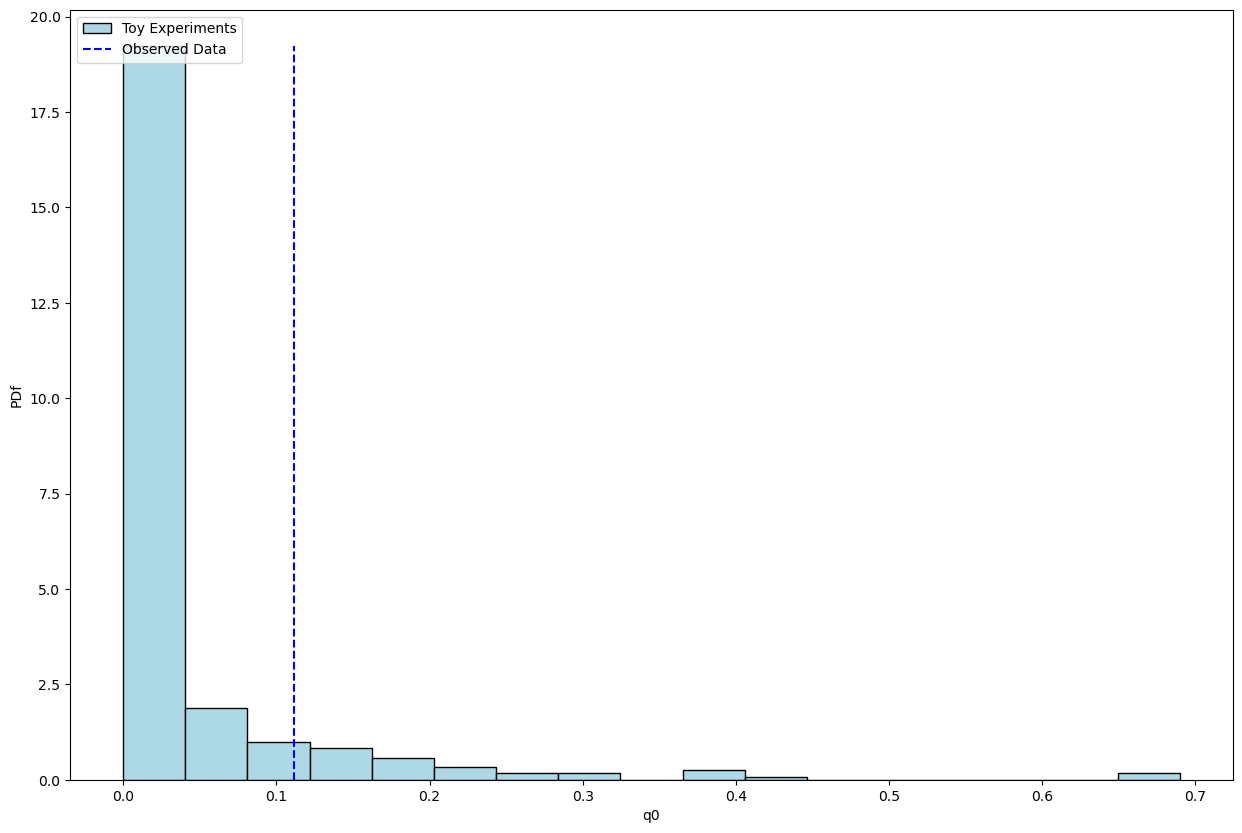

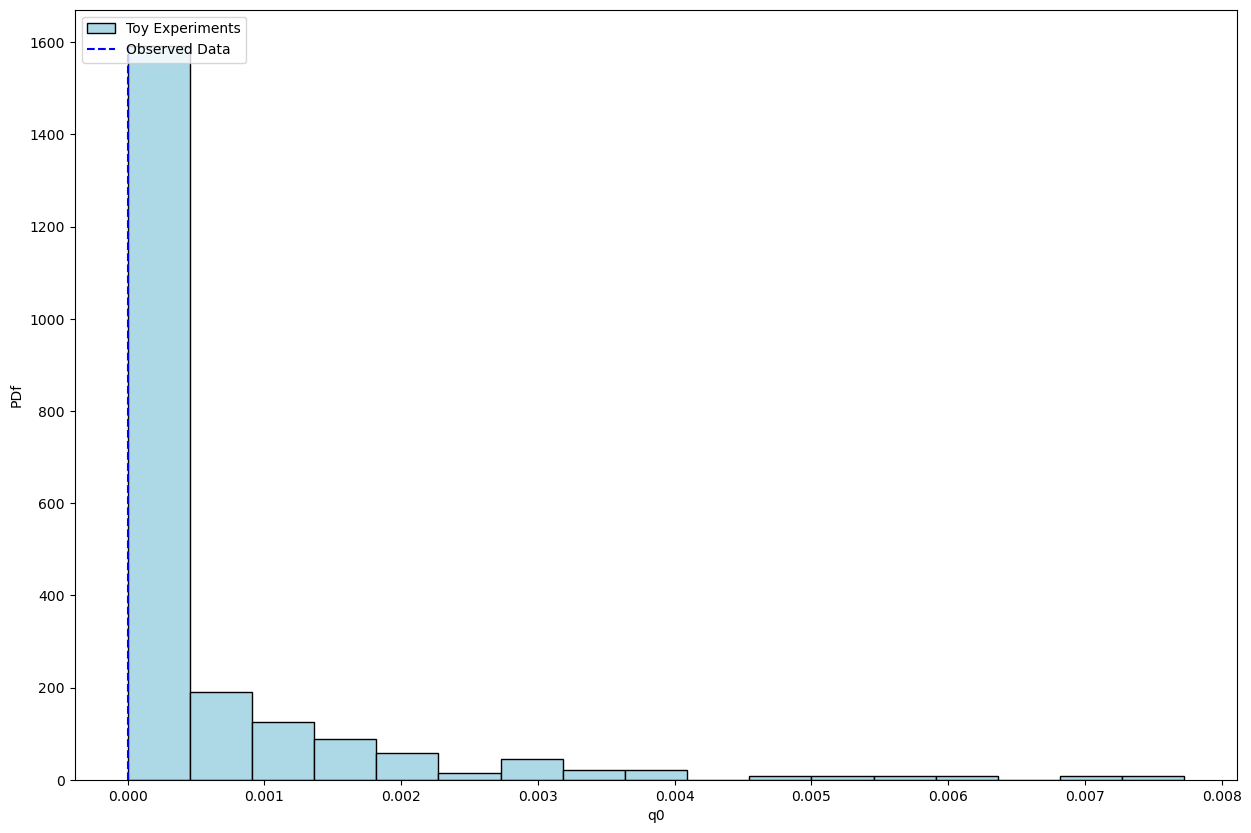

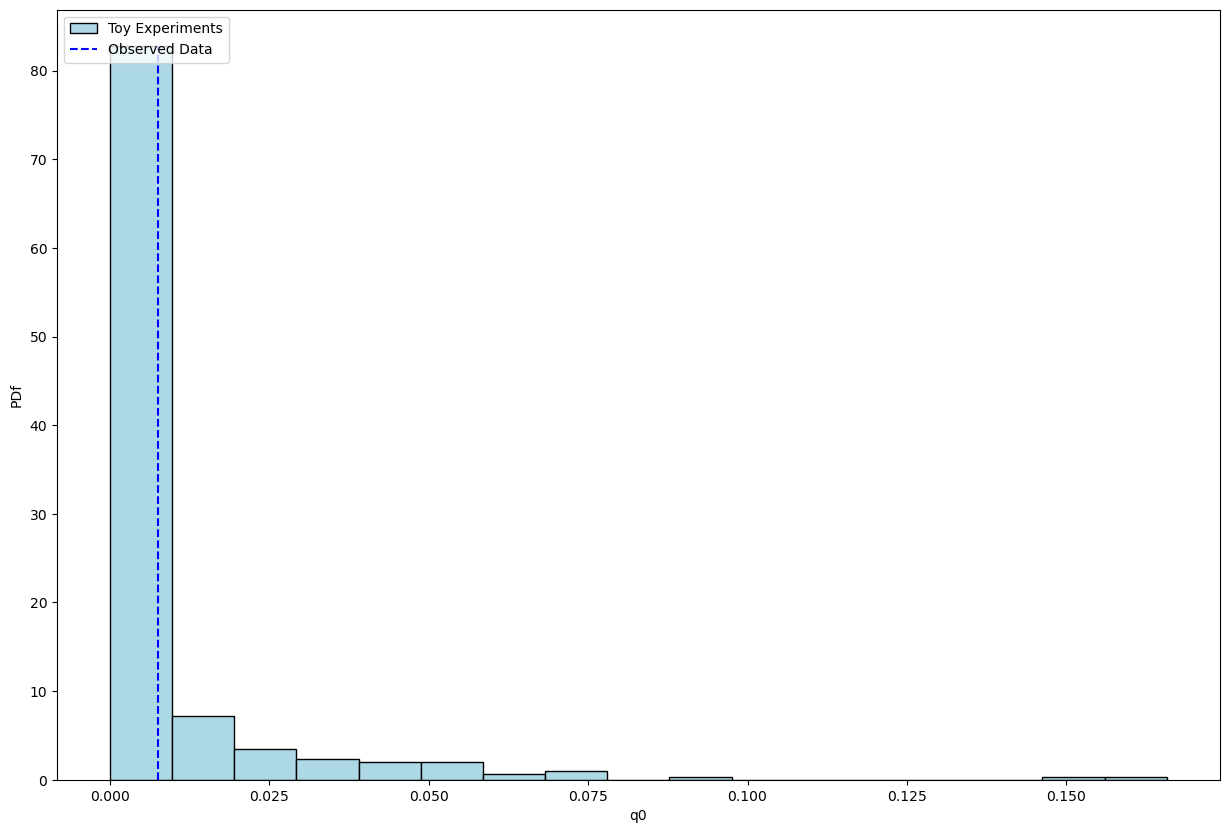

In [14]:
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_1, fits.signal_gauss, n=300, draw=True)
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_2, fits.signal_gauss, n=300, draw=True)
z = stat.significance(freq, fft, weights, res_bkg, center, ref, x0_3, fits.signal_gauss, n=300, draw=True)

### Confidence interval

In [15]:
# def CI(freq, fft, weights, res_bkg, center, ref, x_0, mu_fix, signal, n=1000, verbose = False):
#     # scan different mu
#     #mu_vals = np.array([2,1,1e-4, 5e-5, 1e-5, 5e-6, 1e-6])*fft[np.argmin(fft)]
#     mu_vals = mu_fix
    
#     r = np.zeros(len(mu_vals))
#     for i in range(len(r)):
        
#         print("Testing",mu_vals[i])
        
#         # find the parameters to use in the calculation of L(Data | mu)
#         res_fix = fits.fit_sig(freq, fft, weights, x_0, res_bkg, signal,
#                                mu_init = mu_vals[i], mu_vary = False, par_vary=False)
#         print(res_fix.best_values)   
        
#         # find the parameters to use in the calculation of L(Data | mu_hat)
#         res_sig = fits.fit_sig(freq, fft, weights, x_0, res_bkg, signal)
#         print(res_sig.best_values)        
        
        
#         # compute likelihood ratio of observed data
#         q_mu_obs = stat.lh_ratio(fft, res_fix, res_sig)
#         print("q_mu_obs:",q_mu_obs)
        
        
        
#         #g function -> f(q(mu)|mu=0)
#         #mu=0
#         # generate toy datasets and compute likelihood ratio for all of them
#         toy_fft = stat.gen_toydataset(res_bkg.best_fit, n)
#         toy_weights = toy_fft/np.sqrt(1365500) # NOT UP TO DATE !!!!!!!!!!!!!!!!
    
#         q0 = np.zeros(n)
#         for j in range(n):
#             toy_bkg = fits.fit_bkg(freq, toy_fft[j], toy_weights[j], center, ref)
#             toy_sig = fits.fit_sig(freq, toy_fft[j], toy_weights[j], x_0, toy_bkg, signal)
#             q0[j] = stat.lh_ratio(toy_fft[j], toy_bkg, toy_sig) 
            
# #         plt.hist(q0)
        
        
        
#         toy_fft_mu = stat.gen_toydataset(res_bkg.best_fit, n)
#         toy_weights_mu = toy_fft_mu/np.sqrt(1365500) # NOT UP TO DATE !!!!!!!!!!!!!!!!
    
#         q_mu = np.zeros(n)
        
#         for j in range(n):
#             toy_bkg = fits.fit_bkg(freq, toy_fft_mu[j], toy_weights_mu[j], center, ref)            
            
#             toy_fix = fits.fit_sig(freq, toy_fft_mu[j], toy_weights_mu[j], x_0, toy_bkg, signal,
#                                    mu_init = mu_vals[i], mu_vary = False,par_vary=False)
            
#             toy_sig = fits.fit_sig(freq, toy_fft_mu[j], toy_weights_mu[j], x_0, toy_bkg, signal)

#             q_mu[j] = stat.lh_ratio(toy_fft_mu[j], toy_fix, toy_sig) 
            
# #         plt.hist(q_mu)
        
        
#                 ######## prepare canvas ######
#         fig,ax = plt.subplots(1,1,figsize=(15,10))
    
#         # plot q0 distribution
#         binning = int(np.sqrt(n))
        
#         ax.hist(q_mu, bins=binning, density = True, 
#                           facecolor='lightblue', edgecolor='black', label='Toy Experiments q_mu',alpha=0.5)
        
#         ax.hist(q0, bins=binning, density = True, 
#                          facecolor='red', edgecolor='black', label='Toy Experiments q0',alpha=0.5)
        
        
#         ax.vlines(q_mu_obs, 0, 10, colors='green', linestyles='--', label='Observed Data')
    
#         ax.legend(loc='upper left')
#         ax.set_xlabel('q')
#         ax.set_ylabel('f and g')
    
#         plt.show()
        
#         # compute p-values
#         p_mu = stat.p_value(q_mu, q_mu_obs)
#         p_b  = stat.p_value(q0, q_mu_obs)
        
#         # compute ratio
#         r[i] = p_mu/p_b
        
#         if(verbose):
#             print("Mu: ", mu_vals[i], "\np_mu =", p_mu, "  p_b =", p_b, "  ratio =", r[i], "\n")
    
#     idx = np.argmin(np.abs(r - 0.05))
        
#     return(mu_vals[idx])

In [16]:
mu_fix=np.array([0, 0.05, 0.1, 0.5, 1, 2, 5, 10])

In [17]:
mu_ci = stat.CI(freq, fft, weights, res_bkg, center, ref, x0_1, mu_fix, fits.signal_gauss, n=1000, verbose = True)
mu_ci

Testing 0.0
q_mu_obs: 0.11164875080385173
Mu:  0.0 
p_mu = 0.075   p_b = 0.106   ratio = 0.7075471698113207 

Testing 0.05
q_mu_obs: 0.10620144532003906
Mu:  0.05 
p_mu = 0.108   p_b = 0.109   ratio = 0.9908256880733944 

Testing 0.1
q_mu_obs: 0.10089017097061515
Mu:  0.1 
p_mu = 0.108   p_b = 0.124   ratio = 0.8709677419354839 

Testing 0.5
q_mu_obs: 0.06329697703222337
Mu:  0.5 
p_mu = 0.193   p_b = 0.165   ratio = 1.1696969696969697 

Testing 1.0
q_mu_obs: 0.02854741775945513
Mu:  1.0 
p_mu = 0.59   p_b = 0.286   ratio = 2.062937062937063 

Testing 2.0
q_mu_obs: -0.00014905021225786186
Mu:  2.0 
p_mu = 0.995   p_b = 1.0   ratio = 0.995 

Testing 5.0
q_mu_obs: 0.24011089128953245
Mu:  5.0 
p_mu = 0.886   p_b = 0.036   ratio = 24.611111111111114 

Testing 10.0
q_mu_obs: 1.7278963910839593
Mu:  10.0 
p_mu = 0.896   p_b = 0.0   ratio = inf 



Statistics.ipynb:87: RuntimeWarning: divide by zero encountered in double_scalars
  {


0.0